---
# Correlation between Capacity and Occupancy
---

## Hypotheses

* $H_0:$ The number of occupants is ***dependent*** of the number of available spaces (beds), meaning that as more spaces are made available (increased capacity), they are filled (increased occupancy).
* $H_a:$ The number of occupants is ***not dependent*** of the number of available spaces (beds).  This suggests that the number of available spaces is adequate but would require further study/research.

## Setup

In [ ]:
%reset-f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_leverage_resid2, influence_plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use('seaborn') #plt.style.available
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams.update({'figure.autolayout': True})

## Load Shelter Use Data - Daily Totals

In [ ]:
#Load Prepared Data:
filename_with_path = 'https://raw.githubusercontent.com/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/master/Shelter%20Data/shelter_use_totals_without_families__daily.csv'
shelter_use__daily_totals = pd.read_csv(filename_with_path, index_col=0, parse_dates=True)
shelter_use__daily_totals

,capacity,occupancy,vacancy
Date,,,
2017-01-01,3503,3265,238
2017-01-02,3548,3270,278
2017-01-03,3577,3268,309
2017-01-04,3607,3396,211
2017-01-05,3629,3367,262
...,...,...,...
2019-12-27,4290,4219,71
2019-12-28,4290,4213,77
2019-12-29,4290,4225,65


## Summarize to Weekly Totals to Remove Weekly Seasonality
- Remove partial weeks (first and last row)

In [ ]:
# Resample daily totals to weekly totals
shelter_use__weekly_totals = shelter_use__daily_totals.resample('W').sum()

# Drop partial weeks (first and last row)
shelter_use__weekly_totals = shelter_use__weekly_totals.iloc[1:len(shelter_use__weekly_totals)-1]
shelter_use__daily_totals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-01-01 to 2019-12-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   capacity   1095 non-null   int64
 1   occupancy  1095 non-null   int64
 2   vacancy    1095 non-null   int64
dtypes: int64(3)
memory usage: 34.2 KB


## Plot Capacity vs. Occupancy - Compare Daily and Weekly

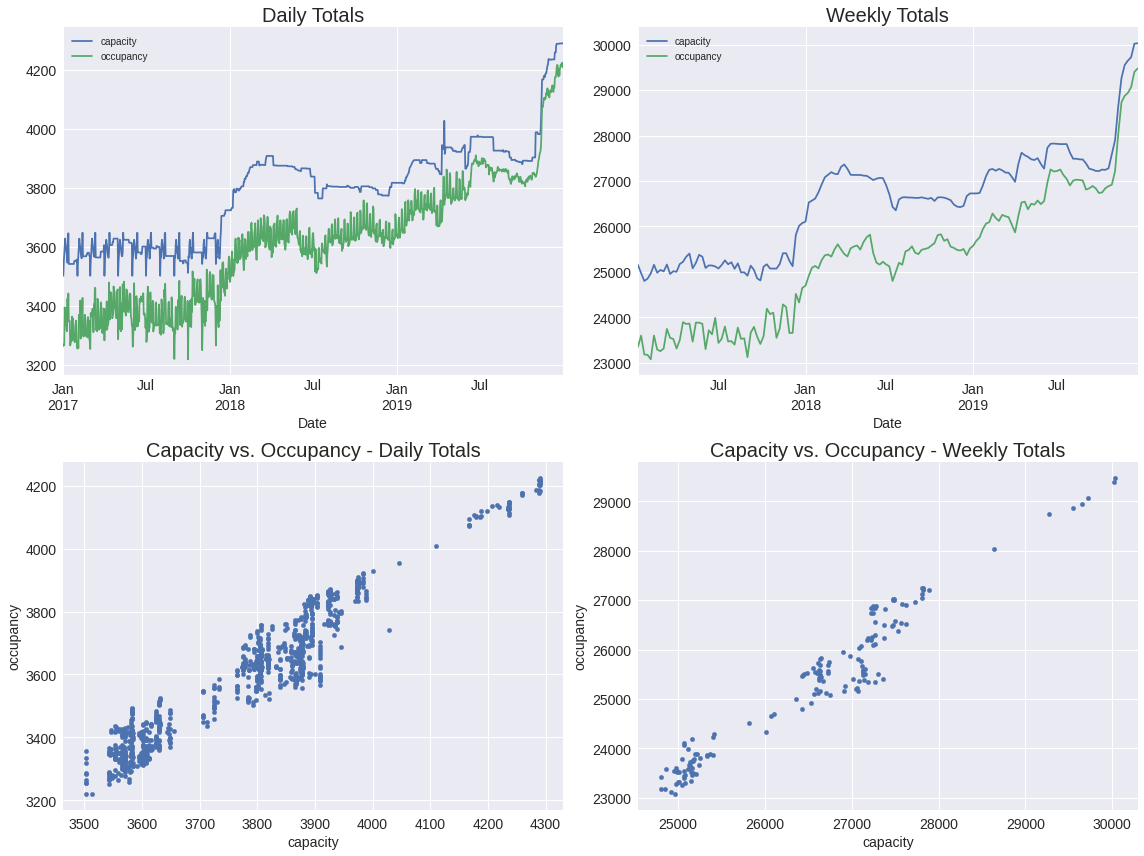

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax4 = plt.subplot2grid((2, 2), (1, 1))

shelter_use__daily_totals[['capacity','occupancy']].plot(ax=ax1, title='Daily Totals');
shelter_use__weekly_totals[['capacity','occupancy']].plot(ax=ax2, title='Weekly Totals');
shelter_use__daily_totals.plot.scatter('capacity','occupancy',title='Capacity vs. Occupancy - Daily Totals', ax=ax3);
shelter_use__weekly_totals.plot.scatter('capacity','occupancy',title='Capacity vs. Occupancy - Weekly Totals', ax=ax4);

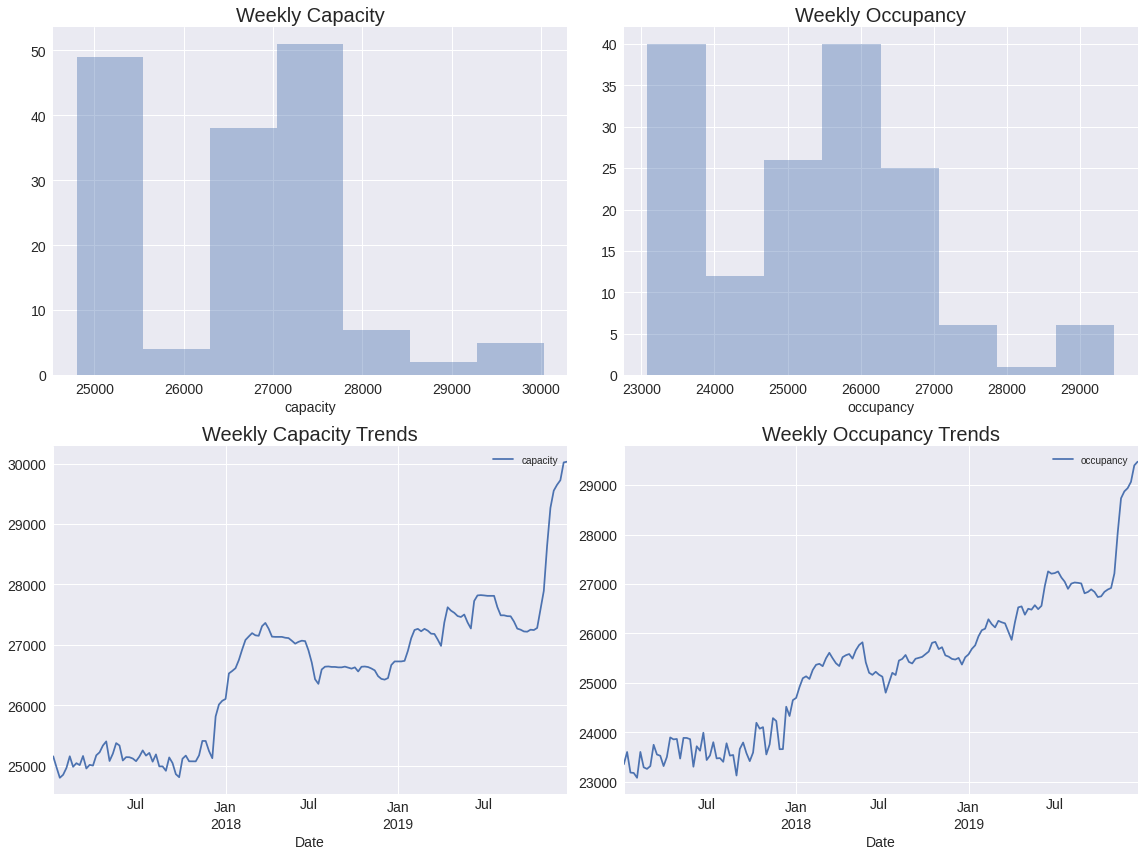

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax00 = plt.subplot2grid((2, 2), (0, 0))
ax01 = plt.subplot2grid((2, 2), (0, 1))
ax10 = plt.subplot2grid((2, 2), (1, 0))
ax11 = plt.subplot2grid((2, 2), (1, 1))

data = shelter_use__weekly_totals

sns.distplot(data.capacity, kde=False, norm_hist=False, ax=ax00,).set_title('Weekly Capacity');
sns.distplot(data.occupancy, kde=False, norm_hist=False,ax=ax01).set_title('Weekly Occupancy');
data[['capacity']].plot(ax=ax10, title='Weekly Capacity Trends');
data[['occupancy']].plot(ax=ax11, title='Weekly Occupancy Trends');

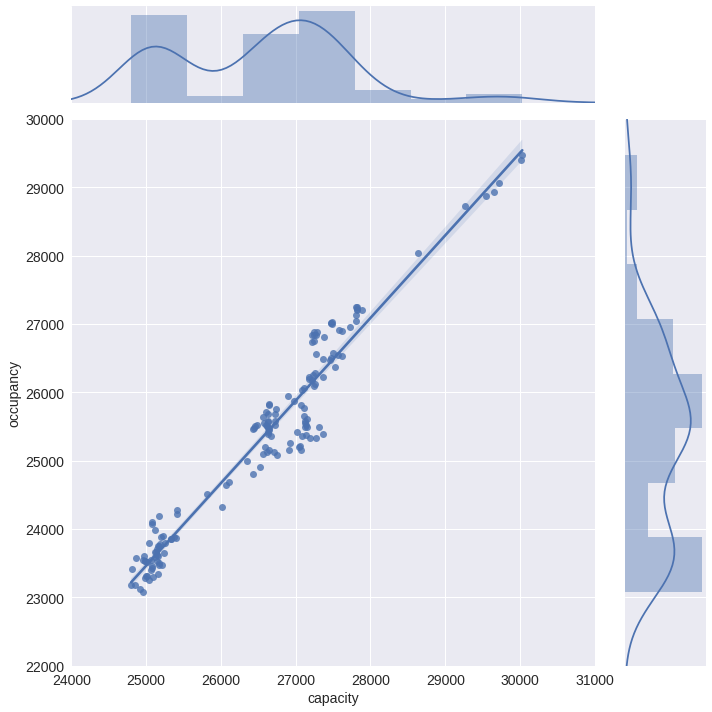

In [ ]:
data = shelter_use__weekly_totals
g = sns.JointGrid(x='capacity', y='occupancy', data=data, height=10, ratio=5, xlim=(24000,31000), ylim=(22000,30000))
g.plot(sns.regplot, sns.distplot);

## Fit the Linear Regression Model

In [ ]:
data = shelter_use__weekly_totals

# Calculate intercept and slope
m = sm.ols('occupancy ~ capacity', data = data[['capacity','occupancy']])
m = m.fit()
intercept, slope = m.params

# Find y estimates and residual errors
data['y_est'] = intercept + slope * data.capacity
data['residuals'] = data['y_est'] - data['occupancy']

In [ ]:
# Describe the residuals
display(pd.DataFrame(data.residuals.describe().round(2)).T)
print('\n')

# OLS Regression Results 
print(m.summary())

,count,mean,std,min,25%,50%,75%,max
residuals,156.0,0.0,341.31,-706.48,-197.33,-30.53,151.38,923.91




                            OLS Regression Results                            
Dep. Variable:              occupancy   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2619.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           1.41e-98
Time:                        17:16:08   Log-Likelihood:                -1130.8
No. Observations:                 156   AIC:                             2266.
Df Residuals:                     154   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6757.1462    627.482    -10.769      0

## Inspect Regression Model

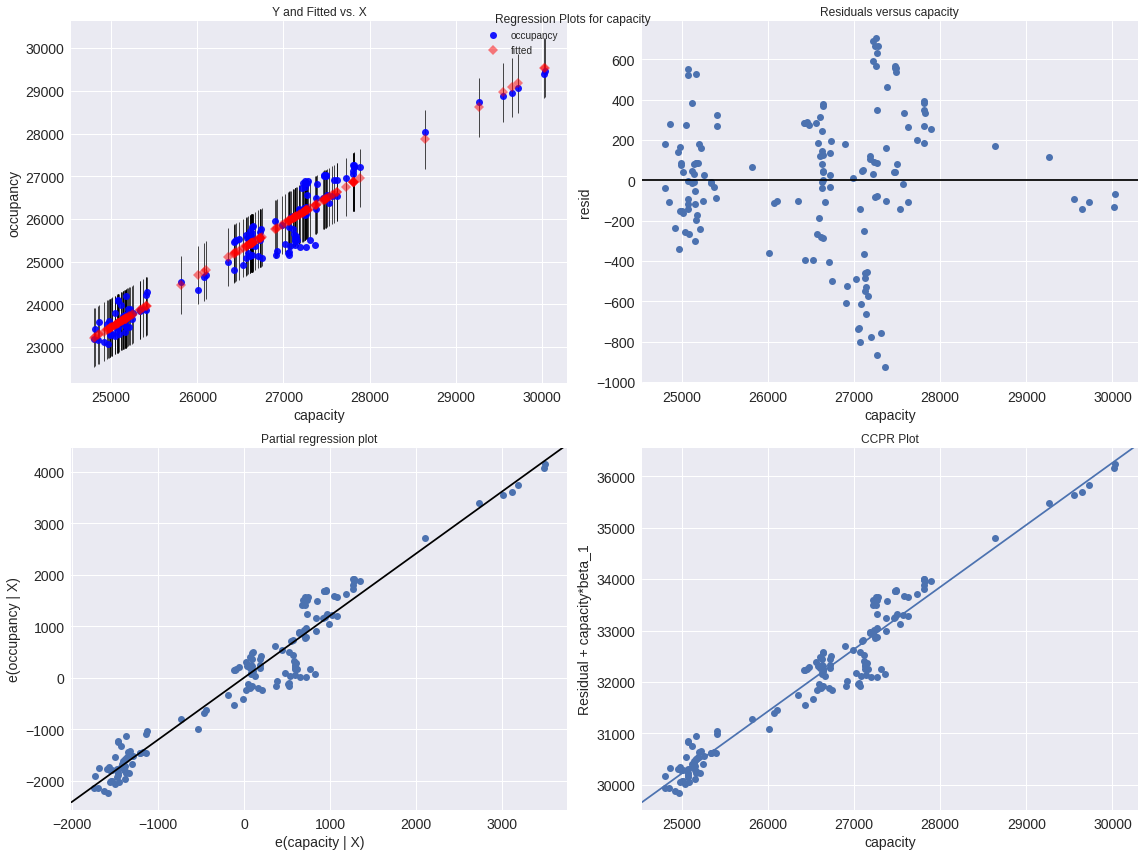

In [ ]:
fig = plt.figure(figsize=(16, 12))
fig = plot_regress_exog(m, "capacity", fig = fig);

### Confirm that larger residuals have lower leverage.

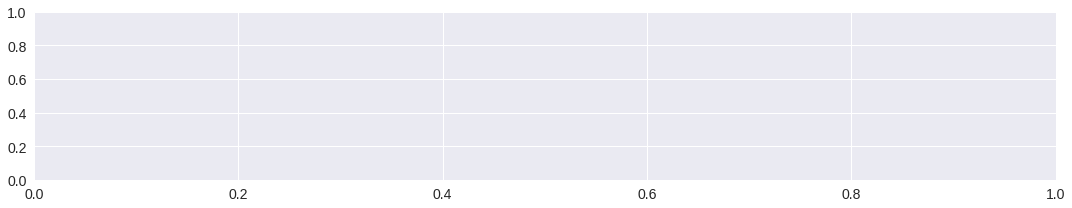

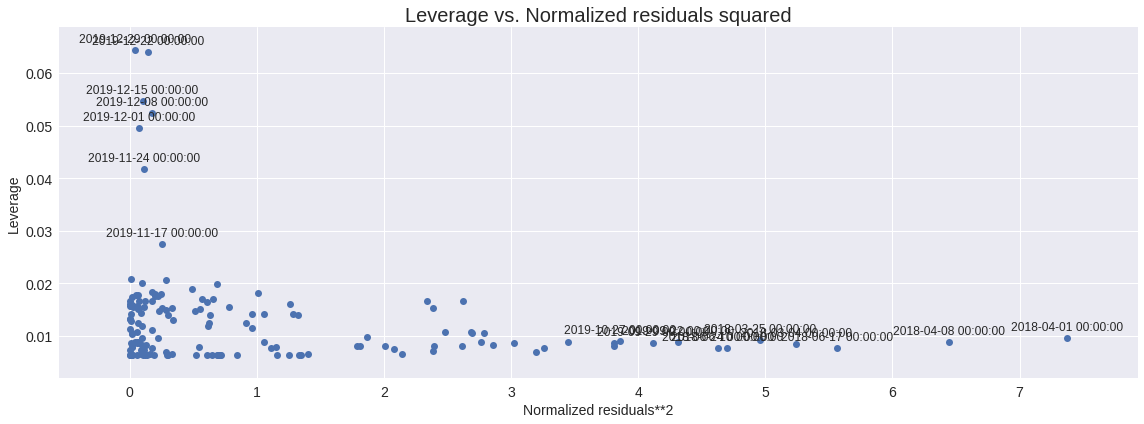

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
fig = plot_leverage_resid2(m, ax=ax)

## Testing the OLS Assumptions

### 1. Linearity
   - True - The relationship can be represented by a linear equation.


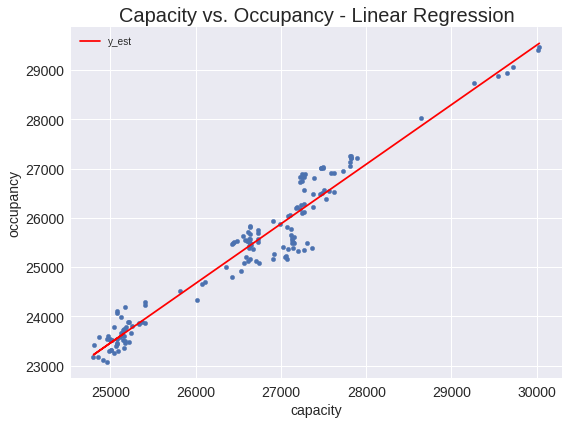

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
data.plot.scatter('capacity','occupancy',title='Capacity vs. Occupancy - Linear Regression', ax=ax);
data.plot.line('capacity','y_est', c='r', ax=ax);

### 2. Homoscedasticity (Nearly Normal Residuals)
  - Histogram shows a normal distribution of residuals.


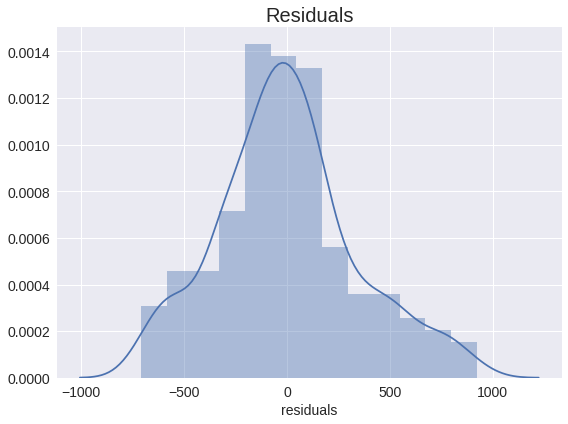

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data.residuals,ax=ax).set_title('Residuals');
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

### 3. Constant Variability / No Autocorrelation
  - Significant autocorrelation is visible beyond 30 weeks in both variables.
  - No relationship between residuals and capacity.
  

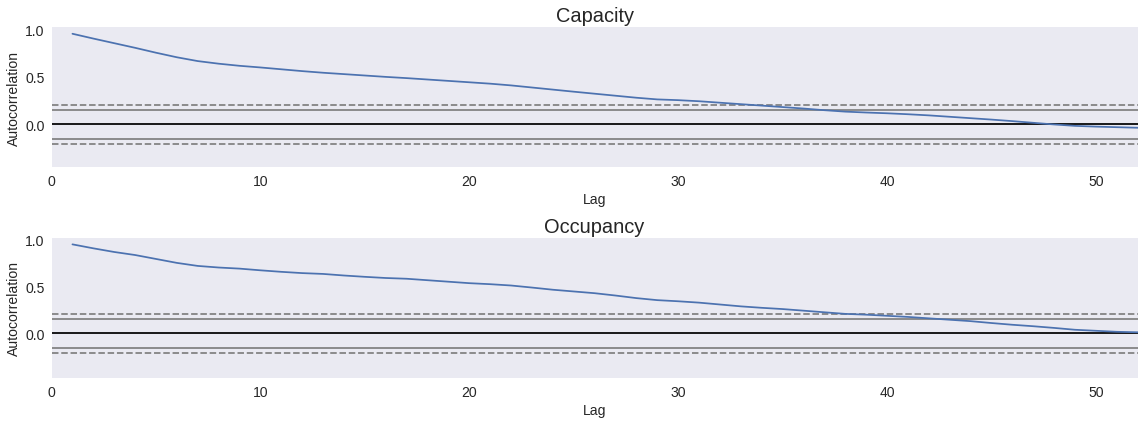

In [ ]:
max_lag = 52 # 52 weeks = 1 year
fig, (ax1, ax2) = plt.subplots(2, 1)
pd.plotting.autocorrelation_plot(data.capacity, ax = ax1)
pd.plotting.autocorrelation_plot(data.occupancy, ax = ax2)

ax1.set_title('Capacity')
ax1.set_xlim(0, max_lag)

ax2.set_title('Occupancy')
ax2.set_xlim(0, max_lag)

plt.show()

### 4. Independent Observations
  - The autocorrelation of the residuals is less than that of the predictor.

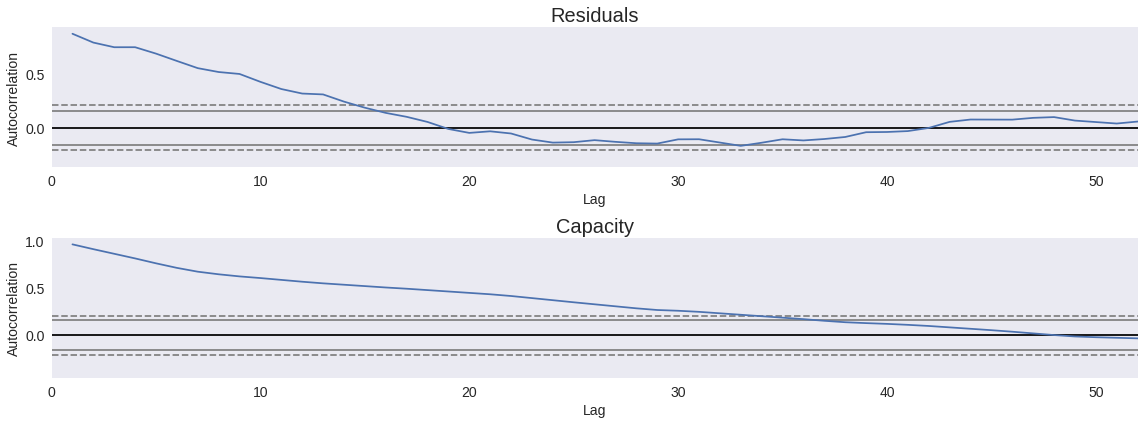

In [ ]:
max_lag = 52 # 52 weeks = 1 year
fig, (ax1, ax2) = plt.subplots(2, 1)
pd.plotting.autocorrelation_plot(data.residuals, ax = ax1)
pd.plotting.autocorrelation_plot(data.capacity, ax = ax2)

ax1.set_title('Residuals')
ax1.set_xlim(0, max_lag)

ax2.set_title('Capacity')
ax2.set_xlim(0, max_lag)

plt.show()

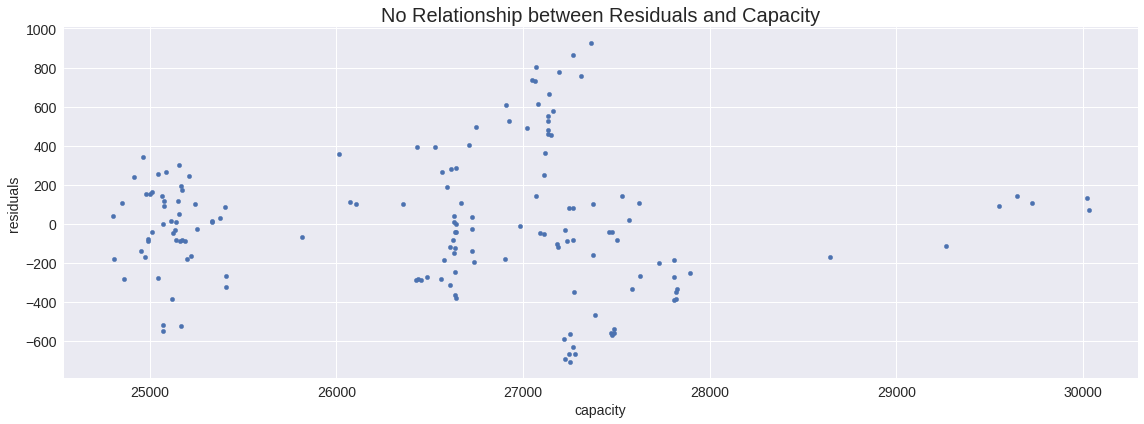

In [ ]:
data.plot.scatter(x='capacity',y='residuals',title='No Relationship between Residuals and Capacity');